## AutoGLuon

In [107]:
import autogluon
import pandas as pd

In [108]:
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame
from autogluon.tabular import TabularDataset, TabularPredictor


In [109]:
import pandas as pd
data = pd.read_excel('airlinesData.xlsx')
data['Month'] = pd.to_datetime(data['Month'])
df = data.copy()

In [110]:
id = ['airline']*96
id[:10]

['airline',
 'airline',
 'airline',
 'airline',
 'airline',
 'airline',
 'airline',
 'airline',
 'airline',
 'airline']

In [111]:
data['id'] = id
data.head()

,Month,Passengers,id
0,1995-01-01,112,airline
1,1995-02-01,118,airline
2,1995-03-01,132,airline
3,1995-04-01,129,airline
4,1995-05-01,121,airline


In [112]:
data = TimeSeriesDataFrame.from_data_frame(
    data,
    id_column="id",
    timestamp_column="Month"
)
data.tail()

Passengers
item_id timestamp             
airline 2002-08-01         405
        2002-09-01         355
        2002-10-01         306
        2002-11-01         271
        2002-12-01         306

In [113]:
data.shape

(96, 1)

In [114]:
data.columns

Index(['Passengers'], dtype='object')

In [115]:
.8*96

76.80000000000001

In [116]:
train = data.head(77)
test = data.tail(19)

In [117]:
len(train)+len(test)

96

In [151]:
predictor = TimeSeriesPredictor(target='Passengers', prediction_length=19, eval_metric="WQL",).fit(train)

Beginning AutoGluon training...
AutoGluon will save models to 'AutogluonModels\ag-20240202_075043'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.8.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          12
GPU Count:          0
Memory Avail:       0.96 GB / 7.33 GB (13.1%)
Disk Space Avail:   262.38 GB / 476.08 GB (55.1%)

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': 'default',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 19,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'Passengers',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 77 rows, 1 time series. Median time series length is 77 (min=77, max=77). 

Provided dataset contains following columns:
	target:           'Pas

In [152]:
 predictor.leaderboard()

,model,score_val,pred_time_val,fit_time_marginal,fit_order
0,WeightedEnsemble,-0.029461,35.386768,1.269901,12
1,RecursiveTabular,-0.054773,0.348655,6.996430,7
2,AutoARIMA,-0.062289,22.921880,0.021548,6
3,AutoETS,-0.063369,32.083833,0.020726,4
4,SeasonalNaive,-0.067141,7.748946,0.011873,1
5,TemporalFusionTransformer,-0.074019,0.019189,145.415436,10
6,PatchTST,-0.084882,0.021169,32.489198,11
7,DeepAR,-0.100420,0.096850,57.170998,9
8,DirectTabular,-0.112112,0.109863,0.954005,8
9,DynamicOptimizedTheta,-0.117820,31.678159,0.017973,5


In [153]:
predictions = predictor.predict(train)
predictions

Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean         0.1         0.2         0.3  \
item_id timestamp                                                    
airline 2001-06-01  269.889239  242.886362  252.613885  258.312619   
        2001-07-01  302.364040  275.218791  282.992353  287.103818   
        2001-08-01  310.592427  286.754957  291.646182  296.680409   
        2001-09-01  270.451490  248.701171  256.365294  258.828385   
        2001-10-01  238.291798  217.122677  225.195790  231.307712   
        2001-11-01  219.660034  196.448564  202.592145  212.719270   
        2001-12-01  241.665158  212.256194  221.648382  234.532203   
        2002-01-01  246.737706  219.218004  225.453391  233.765869   
        2002-02-01  246.777217  217.568757  223.947518  232.243077   
        2002-03-01  273.226745  241.496631  248.851740  258.117117   
        2002-04-01  275.476502  245.345778  252.378746  261.005109   
        2002-05-01  283.351225  248.032134  259.684156  267.671943   
        2002-06-01  300.472832  264.783122  275.392701  284.256141   
        2002-07-01  339.769339  301.087662  312.527188  321.134123   
        2002-08-01  346.465340  307.083354  318.840837  328.126387   
        2002-09-01  305.248999  269.710165  284.074426  288.982330   
        2002-10-01  261.961321  229.361484  241.939674  247.399543   
        2002-11-01  244.406403  209.865920  220.621844  232.206005   
        2002-12-01  261.734529  224.011475  237.006172  247.700288   

                           0.4         0.5         0.6         0.7  \
item_id timestamp                                                    
airline 2001-06-01  265.729474  270.470562  280.566730  280.741989   
        2001-07-01  294.372514  300.618446  309.953838  311.139952   
        2001-08-01  305.754720  311.304541  318.224204  318.117821   
        2001-09-01  265.471206  269.532466  276.342963  280.154104   
        2001-10-01  235.266819  238.355223  245.359148  247.574518   
        2001-11-01  218.528162  220.552946  226.016877  229.693735   
        2001-12-01  238.731759  242.578505  247.420416  251.757921   
        2002-01-01  241.679973  247.428431  251.757813  254.479039   
        2002-02-01  241.341434  247.520951  252.216984  254.834796   
        2002-03-01  266.120280  275.142082  280.805477  282.981560   
        2002-04-01  268.499717  274.445954  284.848285  286.719553   
        2002-05-01  274.596249  285.739556  293.905937  296.139640   
        2002-06-01  293.482880  301.014849  311.682792  312.796473   
        2002-07-01  329.478660  340.467575  347.637630  352.590595   
        2002-08-01  336.989064  349.036366  353.386450  358.593976   
        2002-09-01  295.664516  304.852400  310.654223  317.438290   
        2002-10-01  252.798867  262.437687  267.564993  274.548247   
        2002-11-01  239.221714  245.218687  249.339042  256.320438   
        2002-12-01  255.090497  262.954263  266.918397  273.526415   

                           0.8         0.9  
item_id timestamp                           
airline 2001-06-01  289.621648  302.827204  
        2001-07-01  318.997196  332.412784  
        2001-08-01  325.325247  332.128712  
        2001-09-01  286.245488  291.287642  
        2001-10-01  254.987284  258.731818  
        2001-11-01  234.799494  242.838496  
        2001-12-01  259.897702  266.914105  
        2002-01-01  266.988324  281.009830  
        2002-02-01  266.867451  279.741536  
        2002-03-01  294.027604  306.585909  
        2002-04-01  295.671922  311.346355  
        2002-05-01  305.617842  322.679522  
        2002-06-01  324.434973  337.236141  
        2002-07-01  365.025984  375.713810  
        2002-08-01  367.494817  375.808645  
        2002-09-01  325.370647  332.495801  
        2002-10-01  283.051779  290.195689  
        2002-11-01  265.732990  273.303043  
        2002-12-01  284.113410  291.761827

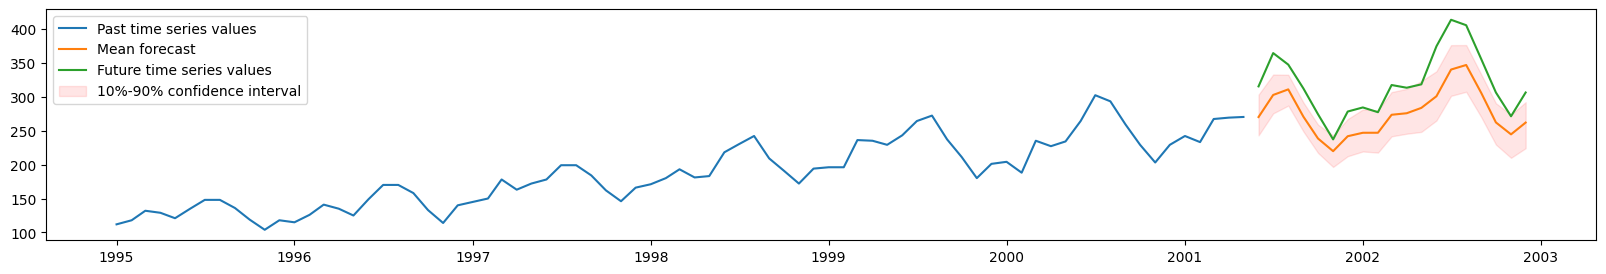

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))

item_id = "airline"
y_past = train.loc[item_id]["Passengers"]
y_pred = predictions.loc[item_id]
y_test = test.loc[item_id]["Passengers"]

plt.plot(y_past, label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();


In [134]:
# Assuming 'model_name' is the name of the model you want to use
# Assuming 'model_name' is the name of the model you want to use
predictions0 = predictor.predict(data=train, model='DeepAR')
predictions0

mean         0.1         0.2         0.3  \
item_id timestamp                                                    
airline 2001-06-01  297.127869  280.395667  286.749298  291.884668   
        2001-07-01  328.507996  312.503159  317.835461  322.354318   
        2001-08-01  347.211899  326.045099  333.684778  340.460089   
        2001-09-01  317.954788  302.140811  308.211877  310.420132   
        2001-10-01  271.932220  254.762384  260.210260  264.204810   
        2001-11-01  253.454796  235.479872  242.343066  246.717435   
        2001-12-01  255.193298  235.174768  241.155066  246.394585   
        2002-01-01  281.250137  258.622925  267.624921  273.938562   
        2002-02-01  303.504135  283.460214  290.646466  296.296265   
        2002-03-01  311.058517  288.870404  297.891534  302.680084   
        2002-04-01  309.150955  288.122275  296.139996  300.902896   
        2002-05-01  313.849060  294.088028  300.756018  305.720740   
        2002-06-01  340.687119  318.703543  327.035236  332.244617   
        2002-07-01  374.108826  352.192880  360.079340  365.474252   
        2002-08-01  385.731125  362.717325  373.842737  378.235028   
        2002-09-01  361.579758  338.091394  346.455566  352.010342   
        2002-10-01  318.356598  296.196222  301.662067  307.399634   
        2002-11-01  293.999329  270.674240  279.746594  284.966650   
        2002-12-01  295.352768  270.838245  280.164758  285.808420   

                           0.4         0.5         0.6         0.7  \
item_id timestamp                                                    
airline 2001-06-01  294.186322  297.127869  300.027765  302.844382   
        2001-07-01  325.762482  328.507996  332.575482  337.376273   
        2001-08-01  343.927844  347.211899  350.916418  354.254126   
        2001-09-01  314.120233  317.954788  320.960663  325.511719   
        2001-10-01  267.775189  271.932220  275.142108  278.395789   
        2001-11-01  249.800607  253.454796  256.944989  260.710315   
        2001-12-01  252.079434  255.193298  258.611963  263.876047   
        2002-01-01  277.969116  281.250137  283.978284  287.792822   
        2002-02-01  299.683154  303.504135  307.397870  310.997073   
        2002-03-01  307.398584  311.058517  313.478986  318.202417   
        2002-04-01  305.249200  309.150955  312.091846  317.384109   
        2002-05-01  309.314630  313.849060  318.605103  323.331320   
        2002-06-01  336.949036  340.687119  344.690039  347.294098   
        2002-07-01  369.819427  374.108826  377.392096  382.008698   
        2002-08-01  382.615985  385.731125  389.371405  394.466315   
        2002-09-01  355.991229  361.579758  364.803583  370.483578   
        2002-10-01  313.504919  318.356598  322.557404  327.281595   
        2002-11-01  290.209546  293.999329  298.370123  303.760501   
        2002-12-01  290.196942  295.352768  298.554810  302.588672   

                           0.8         0.9  
item_id timestamp                           
airline 2001-06-01  307.523480  313.175641  
        2001-07-01  342.285974  346.735364  
        2001-08-01  358.142511  362.623941  
        2001-09-01  329.510083  335.914502  
        2001-10-01  281.902924  289.172818  
        2001-11-01  265.091742  271.751706  
        2001-12-01  268.059668  276.479984  
        2002-01-01  291.915381  299.023914  
        2002-02-01  316.307263  323.920398  
        2002-03-01  322.932733  328.921368  
        2002-04-01  321.255414  326.788034  
        2002-05-01  328.314362  334.221902  
        2002-06-01  351.360944  359.178961  
        2002-07-01  386.454236  392.998969  
        2002-08-01  400.696002  408.182901  
        2002-09-01  374.211115  382.250836  
        2002-10-01  332.140051  338.947894  
        2002-11-01  307.729822  313.484000  
        2002-12-01  308.519788  314.569119

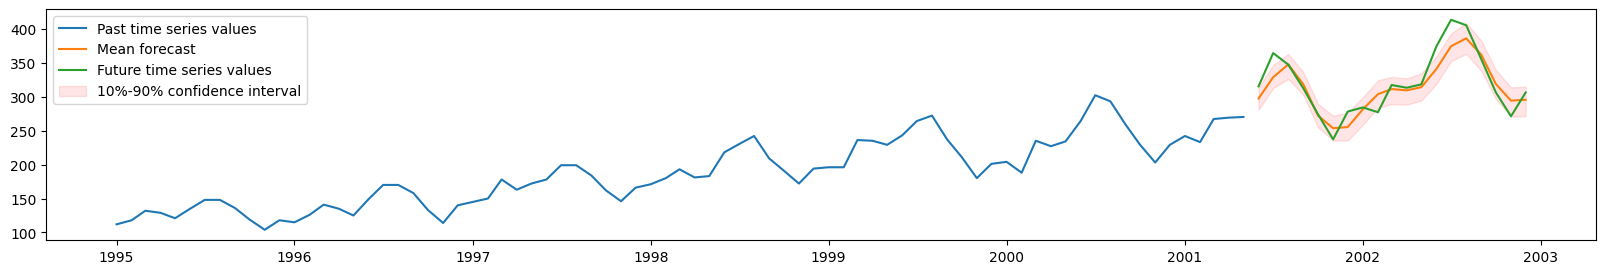

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))

item_id = "airline"
y_past = train.loc[item_id]["Passengers"]
y_pred = predictions0.loc[item_id]
y_test = test.loc[item_id]["Passengers"]

plt.plot(y_past, label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

In [137]:
available_models = predictor.get_model_names()
available_models

C:\Users\rakes\AppData\Local\Temp\ipykernel_14740\1926784027.py:1: DeprecationWarning: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead. This will raise an error in the future!
  available_models = predictor.get_model_names()


['SeasonalNaive',
 'CrostonSBA',
 'NPTS',
 'AutoETS',
 'DynamicOptimizedTheta',
 'AutoARIMA',
 'RecursiveTabular',
 'DirectTabular',
 'DeepAR',
 'TemporalFusionTransformer',
 'PatchTST',
 'WeightedEnsemble']

In [ ]:
===============================================================================================================================

In [102]:
predictor1 = TimeSeriesPredictor(target='Passengers', prediction_length=19).fit(
   train,
   hyperparameters={
      "DeepAR": {},
   },
)

Beginning AutoGluon training...
AutoGluon will save models to 'AutogluonModels\ag-20240201_193851'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.8.18
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          12
GPU Count:          0
Memory Avail:       1.51 GB / 7.33 GB (20.6%)
Disk Space Avail:   262.48 GB / 476.08 GB (55.1%)

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'DeepAR': {}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 19,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'Passengers',
 'verbosity': 2}

Inferred time series frequency: 'MS'
Provided train_data has 77 rows, 1 time series. Median time series length is 77 (min=77, max=77). 

Provided dataset contains following columns:
	target:          

In [105]:
predictions = predictor1.predict(train)
predictions

Model not specified in predict, will default to the model with the best validation score: DeepAR


mean         0.1         0.2         0.3  \
item_id timestamp                                                    
airline 2001-06-01  318.949249  302.490527  309.095117  312.404230   
        2001-07-01  348.169495  330.693179  337.310626  340.018726   
        2001-08-01  345.686920  330.829687  335.456787  339.753391   
        2001-09-01  313.549286  299.536310  304.787396  308.024496   
        2001-10-01  269.538940  252.994775  260.344373  264.507367   
        2001-11-01  251.819641  235.143597  241.375461  245.520818   
        2001-12-01  262.141724  246.989929  251.703976  254.401990   
        2002-01-01  273.961151  257.008661  263.472504  267.676102   
        2002-02-01  290.718536  271.968451  278.511798  284.226083   
        2002-03-01  305.086395  288.247275  294.352753  298.660480   
        2002-04-01  313.841125  295.126608  302.772076  307.733502   
        2002-05-01  338.105072  320.312430  326.618988  330.914282   
        2002-06-01  372.262177  354.010498  360.051031  365.040134   
        2002-07-01  394.690338  378.458243  384.830359  388.304263   
        2002-08-01  384.877350  367.090341  373.341382  377.652762   
        2002-09-01  345.270599  329.701688  335.697186  338.815857   
        2002-10-01  298.424133  283.270807  288.107581  292.377765   
        2002-11-01  281.763458  264.167709  270.687531  275.440204   
        2002-12-01  288.789551  270.408102  276.437756  281.340073   

                           0.4         0.5         0.6         0.7  \
item_id timestamp                                                    
airline 2001-06-01  315.554694  319.201675  322.201599  324.682602   
        2001-07-01  343.568665  347.691055  351.356976  354.549091   
        2001-08-01  342.660840  345.791138  348.653284  351.518317   
        2001-09-01  310.565222  312.602142  316.003845  318.377911   
        2001-10-01  266.980676  269.596436  273.665009  276.306726   
        2001-11-01  248.238184  250.461418  254.919983  257.974057   
        2001-12-01  257.990302  261.424377  265.534039  269.072342   
        2002-01-01  270.681171  273.741302  276.245044  281.227106   
        2002-02-01  287.640186  290.893570  294.517944  298.286148   
        2002-03-01  302.297382  305.064392  308.809412  311.066824   
        2002-04-01  310.801752  313.783676  316.757910  319.800735   
        2002-05-01  334.971863  338.403488  342.250549  344.173593   
        2002-06-01  369.522162  372.859390  375.640839  380.527591   
        2002-07-01  391.423248  394.890884  396.989618  400.393704   
        2002-08-01  380.608624  385.576248  388.555261  392.292584   
        2002-09-01  342.344128  344.595032  347.653912  351.887027   
        2002-10-01  295.275092  298.852768  302.930023  305.731448   
        2002-11-01  279.547217  282.728577  285.701666  289.001859   
        2002-12-01  286.288947  289.649796  292.923486  296.421576   

                           0.8         0.9  
item_id timestamp                           
airline 2001-06-01  329.307135  335.321088  
        2001-07-01  359.172302  365.389581  
        2001-08-01  355.589825  361.524692  
        2001-09-01  321.421503  329.027148  
        2001-10-01  278.696893  284.481287  
        2001-11-01  263.906403  267.682404  
        2001-12-01  273.284583  280.318518  
        2002-01-01  285.285406  290.781754  
        2002-02-01  302.670471  306.951947  
        2002-03-01  315.725006  322.447162  
        2002-04-01  325.163275  331.975766  
        2002-05-01  347.808215  356.287863  
        2002-06-01  383.818701  390.305872  
        2002-07-01  404.845709  409.526682  
        2002-08-01  396.857373  403.504190  
        2002-09-01  356.115631  362.476767  
        2002-10-01  309.797894  313.711368  
        2002-11-01  292.687634  298.086844  
        2002-12-01  299.951508  304.999841

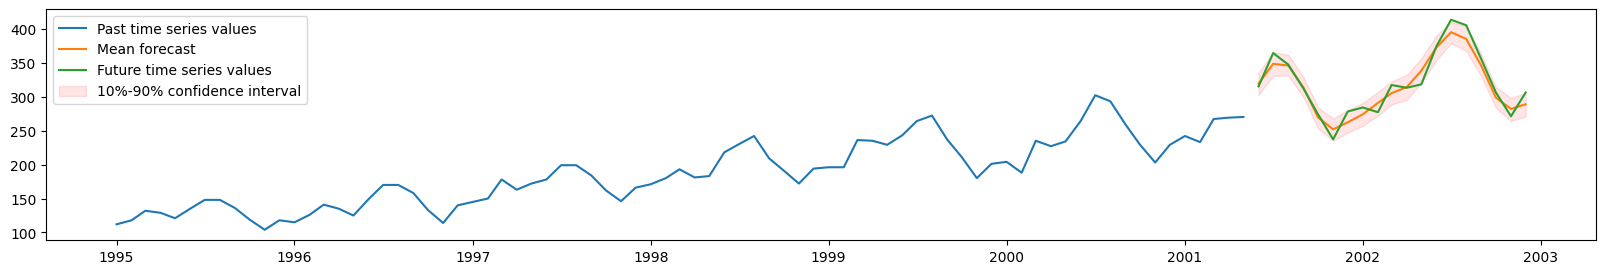

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))

item_id = "airline"
y_past = train.loc[item_id]["Passengers"]
y_pred = predictions.loc[item_id]
y_test = test.loc[item_id]["Passengers"]

plt.plot(y_past, label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

## Jupyter to medium

In [1]:
# token = '272605cb40fd711dcf867ab3f193774d3740764595cc1d44928afed8eba3d953b'

# import jupyter_to_medium as jtm
# jtm.publish('autogluonForecasting.ipynb',
#             integration_token=token,
#             pub_name=None,
#             title='Time Series Forecasting using AutoGluon',
#             tags=None,
#             publish_status='draft',
#             notify_followers=False,
#             license='all-rights-reserved',
#             canonical_url=None,
#             chrome_path=None,
#             save_markdown=False,
#             table_conversion='matplotlib',
#             gistify=False,
#             gist_threshold=5,
#             public_gists=True
#             )

loading image to medium
loading image to medium
loading image to medium
loading image to medium
loading image to medium
loading image to medium
loading image to medium
loading image to medium
loading image to medium


Image Storage Information from Medium
-------------------------------------

[
    {
        "data": {
            "url": "https://cdn-images-1.medium.com/proxy/1*6UW4hehbvmdP4zNzPfcHBg.png",
            "md5": "6UW4hehbvmdP4zNzPfcHBg"
        }
    },
    {
        "data": {
            "url": "https://cdn-images-1.medium.com/proxy/1*_dc1RTRKAMiz8NhO3Js3KA.png",
            "md5": "_dc1RTRKAMiz8NhO3Js3KA"
        }
    },
    {
        "data": {
            "url": "https://cdn-images-1.medium.com/proxy/1*kGmIORE-qbAQRbQc2IuCTw.png",
            "md5": "kGmIORE-qbAQRbQc2IuCTw"
        }
    },
    {
        "data": {
            "url": "https://cdn-images-1.medium.com/proxy/1*PdL2tevvVh3hPk55IymKEg.png",
            "md5": "PdL2tevvVh3hPk55IymKEg"
        }
    },
    {
 

{'data': {'id': '34f8780b8214',
  'title': 'Time Series Forecasting using AutoGluon',
  'authorId': '12ad77397e05b87893b56d2b5e6598b59aef52c41e85a712d68d1342cb2a3cfe2',
  'url': 'https://medium.com/@mkk.rakesh/34f8780b8214',
  'canonicalUrl': '',
  'publishStatus': 'draft',
  'license': 'all-rights-reserved',
  'licenseUrl': 'https://policy.medium.com/medium-terms-of-service-9db0094a1e0f',
  'tags': []}}